In [1]:
import os
import matplotlib as mp
import pandas as pd
import plotly as pt
import numpy as np

In [2]:
p_pd = pd.read_csv('Mike_posts_and_comments.csv') #likes by me csv

In [3]:
p_pd['Timestamp'] = pd.to_datetime(p_pd['Timestamp'],unit='s', yearfirst=True)

In [4]:
p_pd['year'] = p_pd['Timestamp'].dt.year
p_pd['month'] = p_pd['Timestamp'].dt.month
p_pd['day'] = p_pd['Timestamp'].dt.day
p_pd['hour'] = p_pd['Timestamp'].dt.hour
p_pd.head()

,Timestamp,Reaction,User,Action,Uri,year,month,day,hour
0,2021-02-24 01:03:54,LIKE,Michael Tyler,Michael Tyler likes Kanye Battle's photo.,NaN,2021,2,24,1
1,2021-02-23 03:13:00,LIKE,Michael Tyler,Michael Tyler likes BeGreat.'s photo.,NaN,2021,2,23,3
2,2021-02-23 03:11:43,LIKE,Michael Tyler,Michael Tyler likes Hari Sivaskandan's photo.,NaN,2021,2,23,3
3,2021-02-23 01:29:05,LIKE,Michael Tyler,Michael Tyler likes Taylor Johnson's post.,NaN,2021,2,23,1
4,2021-02-23 01:17:14,LIKE,Michael Tyler,Michael Tyler likes Brandon Cotton's post.,NaN,2021,2,23,1


In [5]:
p_pd = p_pd.drop(columns=['Uri'])

In [6]:
p_pd.head()

,Timestamp,Reaction,User,Action,year,month,day,hour
0,2021-02-24 01:03:54,LIKE,Michael Tyler,Michael Tyler likes Kanye Battle's photo.,2021,2,24,1
1,2021-02-23 03:13:00,LIKE,Michael Tyler,Michael Tyler likes BeGreat.'s photo.,2021,2,23,3
2,2021-02-23 03:11:43,LIKE,Michael Tyler,Michael Tyler likes Hari Sivaskandan's photo.,2021,2,23,3
3,2021-02-23 01:29:05,LIKE,Michael Tyler,Michael Tyler likes Taylor Johnson's post.,2021,2,23,1
4,2021-02-23 01:17:14,LIKE,Michael Tyler,Michael Tyler likes Brandon Cotton's post.,2021,2,23,1


In [7]:
Likes = p_pd[p_pd['Reaction'] == 'LIKE'].count()
Loves = p_pd[p_pd['Reaction'] == 'LOVE'].count()
Haha = p_pd[p_pd['Reaction'] == 'HAHA'].count()
Haha_count = (Haha[['Reaction', 'year']])
Loves_count = (Loves['Reaction'])
Likes_count = (Likes['Reaction'])

In [8]:
def Reaction(Reaction):
    if Reaction == "LIKE":
        return 0
    if Reaction == "HAHA":
        return 1
    if Reaction == "LOVE":
        return 2

In [28]:
p_pd["ReactionType"] = p_pd['Reaction'].map(Reaction)
months = p_pd.groupby('day').count()
months = months.reset_index()
months.head(45)

,day,Timestamp,Reaction,User,Action,year,month,hour,ReactionType
0,1,155,155,155,155,155,155,155,155
1,2,100,100,100,100,100,100,100,100
2,3,94,94,94,94,94,94,94,94
3,4,149,149,149,149,149,149,149,149
4,5,115,115,115,115,115,115,115,115
5,6,98,98,98,98,98,98,98,98
6,7,123,123,123,123,123,123,123,123
7,8,143,143,143,143,143,143,143,143
8,9,113,113,113,113,113,113,113,113
9,10,108,108,108,108,108,108,108,108


In [20]:
p_pd.head()
#must group by day/hour/month/year i.e
pyear = p_pd.groupby(['day', 'month']).count() #grouping by day and month
pyear.head()

Timestamp  Reaction  User  Action  year  hour  ReactionType
day month                                                             
1   1             19        19    19      19    19    19            19
    2             10        10    10      10    10    10            10
    3             16        16    16      16    16    16            16
    4              6         6     6       6     6     6             6
    5              4         4     4       4     4     4             4

<AxesSubplot:xlabel='day', ylabel='ReactionType'>

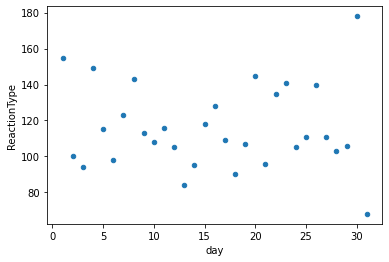

In [19]:
months.plot.scatter(x='day', y='ReactionType')

In [44]:
#Breakdown each dataplot into years
pd_2015 = p_pd[p_pd['year'] == 2015]
pd_2016 = p_pd[p_pd['year'] == 2016]
pd_2017 = p_pd[p_pd['year'] == 2017]
pd_2018 = p_pd[p_pd['year'] == 2018]
pd_2019 = p_pd[p_pd['year'] == 2019]
pd_2020 = p_pd[p_pd['year'] == 2020]
pd_2021 = p_pd[p_pd['year'] == 2021]
pd_2019

,Timestamp,Reaction,User,Action,year,month,day,hour,ReactionType
463,2019-12-30 23:38:46,LIKE,Michael Tyler,Michael Tyler likes Asia Robinson's post.,2019,12,30,23,0
464,2019-12-30 23:37:08,LIKE,Michael Tyler,Michael Tyler likes Brice Messerly's post.,2019,12,30,23,0
465,2019-12-30 15:47:09,LIKE,Michael Tyler,Michael Tyler likes Asia Robinson's post.,2019,12,30,15,0
466,2019-12-23 14:47:47,LIKE,Michael Tyler,Michael Tyler liked a post.,2019,12,23,14,0
467,2019-12-23 14:47:44,LIKE,Michael Tyler,Michael Tyler liked a post.,2019,12,23,14,0
...,...,...,...,...,...,...,...,...,...
574,2019-01-13 03:27:48,LIKE,Michael Tyler,Michael Tyler likes Gavin Harper's post.,2019,1,13,3,0
575,2019-01-12 22:46:00,LIKE,Michael Tyler,Michael Tyler likes Clay Freeman's photo.,2019,1,12,22,0
576,2019-01-04 16:55:33,LIKE,Michael Tyler,Michael Tyler likes Clay Freeman's video.,2019,1,4,16,0
577,2019-01-04 16:54:44,LIKE,Michael Tyler,Michael Tyler likes Elizabeth Cole's photo.,2019,1,4,16,0


[0]


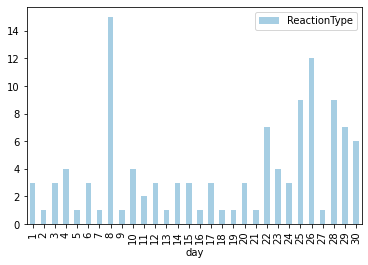

In [187]:
m2019 = pd_2019.groupby(['day', 'Reaction']).count()
m2019 = m2019.reset_index()
m2019.head()
#pd_2019.reset_index()
#pd_2019.plot.bar(x='day', y='ReactionType')
m2019.plot.bar(x='day', y='ReactionType', colormap='Paired')
print(pd_2019['ReactionType'].unique())

[0 1]


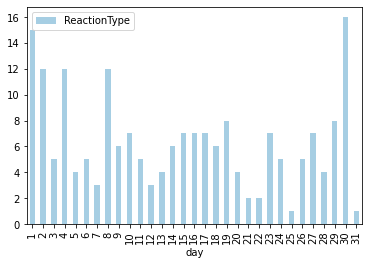

In [120]:
m2016 = pd_2016.groupby(['day']).count()
m2016 = m2016.reset_index()
m2016.head()
#pd_2019.reset_index()
#pd_2019.plot.bar(x='day', y='ReactionType')
m2016.plot.bar(x='day', y='ReactionType', colormap='Paired')
print(pd_2016['ReactionType'].unique())

In [186]:
m2017 = pd_2017.groupby(['month']).count()
m2017 = m2017.reset_index()
m2017.head()
#pd_2019.reset_index()
#pd_2019.plot.bar(x='day', y='ReactionType')
#m2017.plot.bar(x='month', y='ReactionType', stacked=True)
#print(pd_2017['ReactionType'].unique())
m2017

,month,Timestamp,Reaction,User,Action,year,day,hour,ReactionType
0,1,49,49,49,49,49,49,49,49
1,2,31,31,31,31,31,31,31,31
2,3,26,26,26,26,26,26,26,26
3,4,41,41,41,41,41,41,41,41
4,5,26,26,26,26,26,26,26,26
5,6,19,19,19,19,19,19,19,19
6,7,3,3,3,3,3,3,3,3
7,8,4,4,4,4,4,4,4,4
8,9,4,4,4,4,4,4,4,4
9,10,5,5,5,5,5,5,5,5


In [124]:
m2020 = pd_2020.groupby(['month', 'ReactionType']).count()
m2020 = m2020.reset_index()
m2020.head()
Likes = m2020[m2020['Reaction'] == 'LIKE'].count()
Loves = m2020[m2020['Reaction'] == 'LOVE'].count()
Haha = m2020[m2020['Reaction'] == 'HAHA'].count()
Haha_count = (Haha[['Reaction', 'month']])
Loves_count = (Loves[['Reaction', 'month']])
Likes_count = (Likes[['Reaction', 'month']])
#pd_2019.reset_index()
#pd_2019.plot.bar(x='day', y='ReactionType')
print(pd_2020['ReactionType'].unique())

[0]
